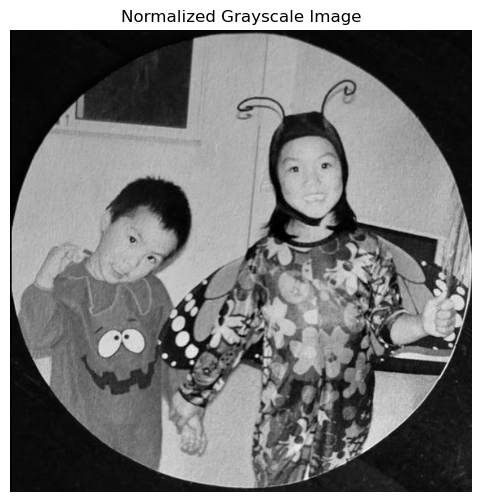

(566, 566)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import color, io

# Load the image and convert to grayscale
img = io.imread("/home/justin/Pictures/jyjy.jpg")
gray_img = color.rgb2gray(img)

# Normalize the image to [0, 1]
normalized_img = (gray_img - gray_img.min()) / (gray_img.max() - gray_img.min())

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(normalized_img, cmap='gray')
plt.axis('off')
plt.title("Normalized Grayscale Image")
plt.show()

normalized_img.shape

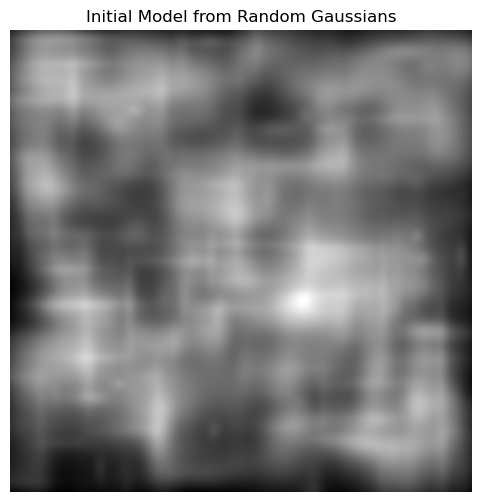

In [5]:
def gaussian_2d(x, y, mu_x, mu_y, sigma_x, sigma_y, amplitude, offset):
    """2D Gaussian function"""
    gauss = offset + amplitude * np.exp(-(((x - mu_x) ** 2) / (2 * sigma_x ** 2)
                                         + ((y - mu_y) ** 2) / (2 * sigma_y ** 2)))
    return gauss

def model_image(params, shape):
    """Generate an image from a set of Gaussian parameters"""
    x = np.linspace(0, shape[1] - 1, shape[1])
    y = np.linspace(0, shape[0] - 1, shape[0])
    x, y = np.meshgrid(x, y)
    
    img = np.zeros(shape)
    for i in range(0, len(params), 7):
        mu_x, mu_y, sigma_x, sigma_y, amplitude, offset, _ = params[i:i+7]
        img += gaussian_2d(x, y, mu_x, mu_y, sigma_x, sigma_y, amplitude, offset)
    return img

# Randomly initialize parameters for 5 Gaussians
num_gaussians = 1000
params = np.array([])

for _ in range(num_gaussians):
    mu_x = np.random.uniform(0, normalized_img.shape[1])
    mu_y = np.random.uniform(0, normalized_img.shape[0])
    sigma_x = np.random.uniform(5, 50)
    sigma_y = np.random.uniform(5, 50)
    amplitude = np.random.uniform(0, 1)
    offset = np.random.uniform(0, 0.1)
    params = np.append(params, [mu_x, mu_y, sigma_x, sigma_y, amplitude, offset, 0])

# Create an image from the initialized parameters
initial_model = model_image(params, normalized_img.shape)

# Display the initial model
plt.figure(figsize=(6, 6))
plt.imshow(initial_model, cmap='gray')
plt.axis('off')
plt.title("Initial Model from Random Gaussians")
plt.show()


In [6]:
from scipy.optimize import minimize

def mse_loss(params, target_image):
    """Mean Squared Error loss between model and target image."""
    model = model_image(params, target_image.shape)
    return np.mean((model - target_image) ** 2)

# Optimize the parameters to fit the image
result = minimize(mse_loss, params, args=(normalized_img), method='L-BFGS-B', options={'maxiter': 100, 'disp': True})

# Create an image from the optimized parameters
optimized_model = model_image(result.x, normalized_img.shape)

# Display the optimized model
plt.figure(figsize=(6, 6))
plt.imshow(optimized_model, cmap='gray')
plt.axis('off')
plt.title("Optimized Model from Gaussians")
plt.show()

KeyboardInterrupt: 